In [2353]:
import pandas as pd

In [2354]:
df = pd.read_csv('https://github.com/JaFaSch/house-market-prediction/raw/main/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [2355]:
df_SP = pd.read_csv('https://github.com/JaFaSch/house-market-prediction/raw/main/S%26P%20500%20Historical%20Data.csv')

In [2356]:
columns_to_drop = ['RegionID', 'SizeRank', 'RegionType', 'StateName']
df = df.drop(columns=columns_to_drop)

In [2357]:
df_SP.drop(columns=['Open', 'High', 'Low', 'Vol.','Change %'], inplace=True)

In [2358]:
df_SP = df_SP.iloc[::-1].reset_index(drop=True)

In [2359]:
first_column = df.iloc[:, 0]
remaining_columns = df.iloc[:, 1:]
remaining_columns = remaining_columns.infer_objects()
remaining_columns_interpolated = remaining_columns.interpolate(method='linear', limit_direction='both')
df = pd.concat([first_column, remaining_columns_interpolated], axis=1)

In [2360]:
nan_counts_per_column = df.isnull().sum()
print("NaN values per column:")
print(nan_counts_per_column)

# 2. Sum these counts to get the total number of NaN values in the DataFrame
total_nan_count = nan_counts_per_column.sum()

# Display the total number of NaN values
print("\nTotal number of NaN values in the DataFrame:")
print(total_nan_count)

NaN values per column:
RegionName    0
2000-01-31    0
2000-02-29    0
2000-03-31    0
2000-04-30    0
             ..
2024-05-31    0
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
Length: 298, dtype: int64

Total number of NaN values in the DataFrame:
0


In [2361]:
df.set_index('RegionName', inplace=True)

In [2362]:
df_final= df.T

In [2363]:
df_final = df_final.drop(df_final.index[-1])

In [2364]:
df_final.index = pd.to_datetime(df_final.index)

In [2365]:
df_SP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    296 non-null    object
 1   Price   296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [2366]:
df_SP['Price'] = df_SP['Price'].str.replace(',', '').astype(float)*100

In [2367]:
df_SP['Price']

0      136640.0
1      149860.0
2      145240.0
3      142060.0
4      145460.0
         ...   
291    527751.0
292    546048.0
293    552230.0
294    564840.0
295    576248.0
Name: Price, Length: 296, dtype: float64

In [2368]:
df_final.index = pd.to_datetime(df_final.index)
df_SP['Date'] = pd.to_datetime(df_SP['Date'])  # Ensure 'Date' column is datetime
df_SP.set_index('Date', inplace=True)  # Set 'Date' as the index for df_SP

# Check if the number of rows match
if len(df_SP) != len(df_final):
    print("Warning: df_SP and df_final do not have the same number of rows.")
else:
    print("df_SP and df_final have the same number of rows.")

# Insert the 'Price' column directly into df_final without reindexing or shifting
df_final.insert(0, 'Price', df_SP['Price'].values)


df_SP and df_final have the same number of rows.


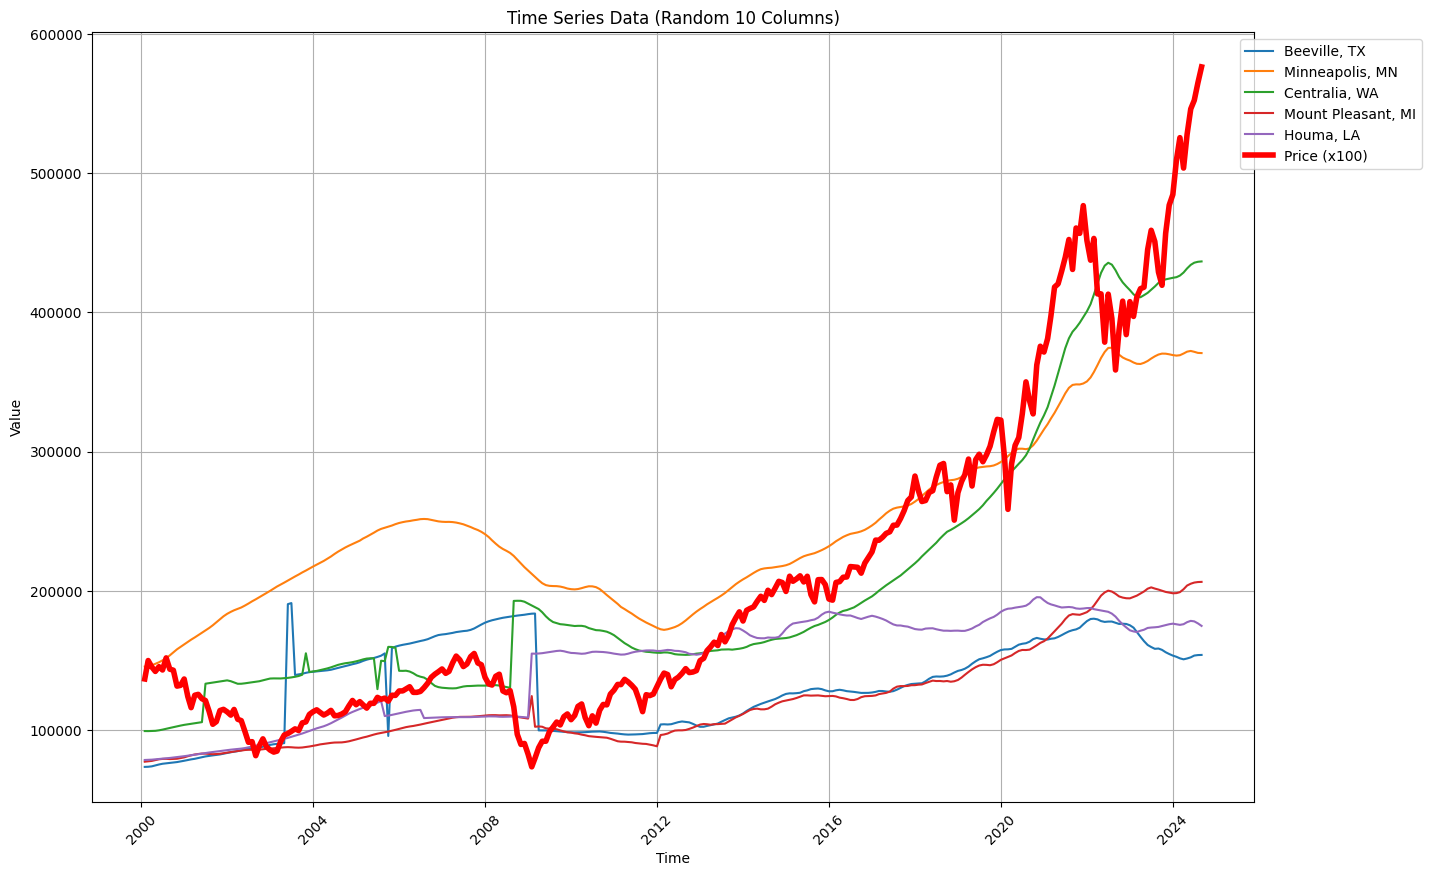

In [2369]:
import matplotlib.pyplot as plt
import random
# 4. Plot the selected columns
random_columns = random.sample(list(df_final.columns), 5)
if 'Price' not in random_columns:
    random_columns.append('Price')
plt.figure(figsize=(15, 10))
for column in random_columns:
    if column == 'Price':
        plt.plot(df_final.index, df_final['Price'], label=f'{column} (x100)', color = 'red', linewidth=4)
    else:
        plt.plot(df_final.index, df_final[column], label=column)

# 5. Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data (Random 10 Columns)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

In [2370]:
city = 'United States'

if city in df_final.columns:
    print(f"'{city}' is a column name.")
    state_data = df_final[city]
else:
    print(f"'{city}' is not a column name.")
    city = 'United States'
    state_data = df_final['city']

'United States' is a column name.


In [2371]:
df_final.head()

RegionName,Price,United States,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Houston, TX","Washington, DC","Philadelphia, PA","Miami, FL",...,"Atchison, KS","Fairfield, IA","Vermillion, SD","Sweetwater, TX","Pecos, TX","Zapata, TX","Ketchikan, AK","Craig, CO","Vernon, TX","Lamesa, TX"
2000-01-31,136640.0,122086.021122,217122.541025,221698.801779,152707.070761,125949.506035,121810.328018,180639.076651,121472.006663,112441.847555,...,75483.594628,78868.462087,82253.329546,85638.197005,89023.064464,92407.931923,95792.799382,99177.666841,99177.666841,99177.666841
2000-02-29,149860.0,122300.809571,218045.189320,222523.802610,152848.433024,126005.604384,121833.017542,180785.950218,121741.993460,112750.523980,...,75474.795532,78897.149181,82319.502829,85741.856478,89164.210126,92586.563774,96008.917423,99431.271071,99431.271071,99431.271071
2000-03-31,145240.0,122567.178873,218976.383000,223622.695850,153117.659942,126070.095181,121747.968766,181056.647924,121926.248702,113077.396451,...,75644.539734,79110.093445,82575.647157,86041.200868,89506.754579,92972.308290,96437.862002,99903.415713,99903.415713,99903.415713
2000-04-30,142060.0,123138.488742,220863.341724,225809.124252,153787.429609,126237.571004,121798.805888,181669.585337,122380.917460,113737.750025,...,75817.462581,79354.366968,82891.271356,86428.175744,89965.080131,93501.984519,97038.888906,100575.793294,100575.793294,100575.793294
2000-05-31,145460.0,123795.997905,222817.352828,228200.391475,154593.081957,126458.383292,121845.701504,182601.354402,122820.903528,114376.782012,...,76137.686081,79740.465508,83343.244935,86946.024362,90548.803789,94151.583216,97754.362643,101357.142071,101357.142071,101357.142071


In [2372]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler

In [2373]:
def predict_houseprice(lag_SP, lag_house):
    # Feature engineering: create lag features
    df_final['HousePrice_Lag1'] = df_final[city].shift(lag_house)
    df_final['SP500_Lag1'] = df_final['Price'].shift(lag_SP)
    df_final.dropna(inplace=True)
    df_final.insert(2, 'HousePrice_Lag1', df_final.pop('HousePrice_Lag1'))
    df_final.insert(3, 'SP500_Lag1', df_final.pop('SP500_Lag1'))
    scaler = StandardScaler()
    df_final[['HousePrice_Lag1', 'SP500_Lag1']] = scaler.fit_transform(df_final[['HousePrice_Lag1', 'SP500_Lag1']])
    train_size = int(len(df_final) * 0.8)
    X_train, X_test = df_final[['SP500_Lag1']][:train_size], df_final[['SP500_Lag1']][train_size:]
    y_train, y_test = df_final[city][:train_size], df_final[city][train_size:]
    best_mae = np.inf
    best_order = None
    best_model = None
    for p in range(0, 3):  # Try p values from 0 to 2
        for d in range(0, 2):  # d = 0 (no differencing) and d = 1 (first differencing)
            for q in range(0, 3):  # Try q values from 0 to 2
                try:
                    model = ARIMA(y_train, order=(p, d, q), exog=X_train)
                    model_fit = model.fit()
                    y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)
                    
                    mae = mean_absolute_error(y_test, y_pred)
                    if mae < best_mae:
                        best_mae = mae
                        best_order = (p, d, q)
                        best_model = model_fit
                except Exception as e:
                    continue
    y_pred = best_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return y_test, y_pred, train_size, df_final.index[train_size:]

In [2374]:
best_mae = float('inf')
best_mse = float('inf')
best_lag_SP = None
best_lag_house = None

# Iterate through lag_SP and lag_house values from 1 to 6
for lag_SP in range(6, 12):
    for lag_house in range(1, 4):
        y_test, y_pred, train_size, pred_index = predict_houseprice(lag_SP, lag_house)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print(f"lag_SP: {lag_SP}, lag_house: {lag_house}, MAE: {mae}, MSE: {mse}")
        
        # Update the best MAE and the corresponding lag values if the current MAE is better
        if mae < best_mae:
            best_mae = mae
            best_lag_SP = lag_SP
            best_lag_house = lag_house
        if mse < best_mse:
            best_mse = mse
            best_lag_SP = lag_SP
            best_lag_house = lag_house

# Print the best MAE and the corresponding lag values


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 6, lag_house: 1, MAE: 27716.12897535838, MSE: 1206569462.3136647


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 6, lag_house: 2, MAE: 32811.0495275805, MSE: 1568186906.0551624


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 6, lag_house: 3, MAE: 34193.14161430804, MSE: 1662582989.7560992


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 7, lag_house: 1, MAE: 34505.04439571391, MSE: 1708278042.093984


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 7, lag_house: 2, MAE: 35966.043519420324, MSE: 1745591773.9531314


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 7, lag_house: 3, MAE: 36231.91872851663, MSE: 1805867362.9662642


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 8, lag_house: 1, MAE: 43080.304053811255, MSE: 2271410964.076613


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 8, lag_house: 2, MAE: 46063.86258223708, MSE: 2507552954.9686418


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 8, lag_house: 3, MAE: 15083.796885479294, MSE: 315504310.35547787


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred

lag_SP: 9, lag_house: 1, MAE: 16108.431463131847, MSE: 497905921.00822854


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 9, lag_house: 2, MAE: 23711.86615368608, MSE: 874710973.1534644


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 9, lag_house: 3, MAE: 23227.058842543447, MSE: 851458816.9072634


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 10, lag_house: 1, MAE: 25480.699635458215, MSE: 987725208.0765953


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 10, lag_house: 2, MAE: 21804.01974084804, MSE: 767509982.9989902


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 10, lag_house: 3, MAE: 19329.685853790987, MSE: 594462017.1410718


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 11, lag_house: 1, MAE: 16765.718079977414, MSE: 309098025.18424535


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 11, lag_house: 2, MAE: 9857.796069182998, MSE: 120917924.0699307


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

lag_SP: 11, lag_house: 3, MAE: 4248.301881952972, MSE: 29610978.6379904


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [2375]:
print(f"Best MAE: {best_mae} with lag_SP: {best_lag_SP} and lag_house: {best_lag_house}")
print(f"Best MSE: {best_mse} with lag_SP: {best_lag_SP} and lag_house: {best_lag_house}")

Best MAE: 4248.301881952972 with lag_SP: 11 and lag_house: 3
Best MSE: 29610978.6379904 with lag_SP: 11 and lag_house: 3


In [2376]:
# Create a new DataFrame for plotting, initializing with actual prices
predicted_df = pd.DataFrame({
    'Actual': df_final[city],
    'Predicted': np.nan  # Start with NaN for the predictions
}, index=df_final.index)

# Fill the 'Predicted' column with predictions starting from the training size
predicted_df.loc[pred_index, 'Predicted'] = y_pred  # Use pred_index here

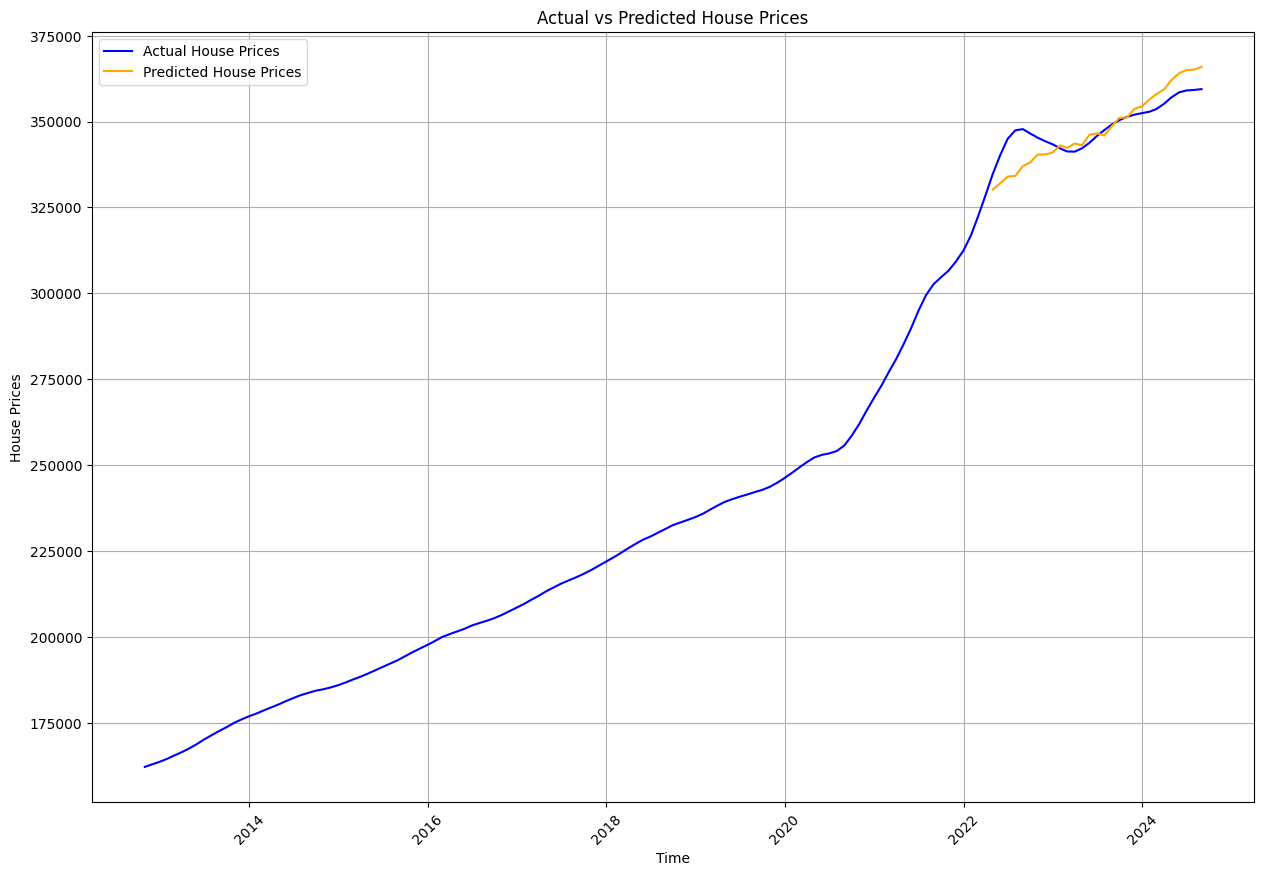

In [2377]:
plt.figure(figsize=(15, 10))
plt.plot(predicted_df.index, predicted_df['Actual'], label='Actual House Prices', color='blue')
plt.plot(predicted_df.index, predicted_df['Predicted'], label='Predicted House Prices', color='orange')
plt.xlabel('Time')
plt.ylabel('House Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()
